We recommend running this notebook on Google Colab to avoid having to install dependencies.

## Load packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
import random

from numpy import linalg
from sklearn import datasets
from sklearn import metrics


EPS = 1e-9
np.random.seed(0)
random.seed(0)

## Creating the dataset

We create a dataset with 100 points and plot it as a scatter plot. Run this block to see the scatter plot of data points.


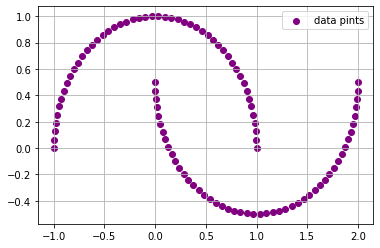

In [ ]:
ds = sklearn.datasets.make_moons(n_samples=100)[0]

def plot_scatter(xs, ys, labels=None, colors=None):
    """
    Scatter plot of a list of data points
    :param xs: list of points for the first dimension
    :param ys: list of points for the second dimension
    :param labels: list of labels associated with each xs[i] and ys[i], e.g., labels[i]
    :return: None
    """
    assert(len(xs) == len(ys))
    fig, ax = plt.subplots()

    for i in range(len(xs)):
        label = None
        color = None
        if labels is not None and len(labels) >= i:
            label = labels[i]
        if colors is not None and len(colors) >= i:
            color = colors[i]
        ax.scatter(xs[i], ys[i], label=label, color=color)

    if labels is not None:
        ax.legend()
    ax.grid(True)
    fig.show()

plot_scatter([ds[:, 0]], [ds[:, 1]], labels=['data pints'], colors=['purple'])

## Part a: Computing Gram matrices

Implement the following methods for computing **A** and **B**.

In [ ]:
def dot_gram(ds):
    """
    IMPLEMENT ME
    Computes the Gram matrix w.r.t the inner product
    :param ds: dataset
    :return: The Gram matrix
    """
    # Hint: You may use the polynomial_kernel function in the sklearn module (be careful about the parameters) or use numpy 
    G = np.array(ds)
    return np.dot(G, np.transpose(G))

def quadratic_gram(ds):
    """
    IMPLEMENT ME
    Computes the Gram matrix w.r.t the quadratic kernel
    :param ds: dataset
    :return: The Gram matrix
    """
    G = np.array(ds)
    G = np.dot(G, np.transpose(G))
    G = 1+G
    return pow(G,2)

A = dot_gram(ds)
B = quadratic_gram(ds)

assert A.shape == (100, 100), 'The shape of A must be 100x100'
assert A.dtype == np.float64, 'The type of A must be float64'
assert B.shape == (100, 100), 'The shape of B must be 100x100'
assert B.dtype == np.float64, 'The type of B must be float64'

## Part b: Computing rank, eigendecomposition and positive semi-definiteness

Implement the following section to compute the rank, eigendecomposition and positive semi-definiteness of **A** and **B**.

In [ ]:
def compute_rank(m):
    """
    IMPLEMENT ME
    Computes the rank of a matrix
    :param m: The matrix to compute the rank of
    :return: An integer, i.e, the rank of m
    """
    return linalg.matrix_rank(m) 
  
def compute_eigendecomposition(m):
    """
    IMPLEMENT ME
    Computes the eigendecomposition of a matrix
    :param m: The matrix to compute the eigendocomposition of
    :return: (eigenvalues, eigenvectors)
    """
    return linalg.eig(m)

def is_positive_semi_definite(m):
    """
    IMPLEMENT ME
    Whether m is positive semi-definite or not
    :param m: The matrix to see if it is positive semi-definite or not
    :return: A boolean, True if m is positive semi-definite, False otherwise
    """
    # For this part, consider any number x that satisfies -EPS < x < EPS as zero
    # print (np.linalg.eigvals(m))
    m[np.abs(m) < EPS] = 0
    return not np.all(np.linalg.eigvals(m) >= 0)

A_rank = compute_rank(A)
print('The rank of A is', A_rank)

B_rank = compute_rank(B)
print('The rank of B is', B_rank)

A_eig_vals, A_eig_vecs = compute_eigendecomposition(A)
assert np.allclose(np.matmul(np.matmul(A_eig_vecs, np.diag(A_eig_vals)), linalg.inv(A_eig_vecs)),
                    A), 'eigendecomposition of A is not correct'

B_eig_vals, B_eig_vecs = compute_eigendecomposition(B)
assert np.allclose(np.matmul(np.matmul(B_eig_vecs, np.diag(B_eig_vals)), linalg.inv(B_eig_vecs)),
                    B), 'eigendecomposition of B is not correct'

print('A is positive semi-definite:', is_positive_semi_definite(A))
print('B is positive semi-definite:', is_positive_semi_definite(B))

The rank of A is 2
The rank of B is 6
A is positive semi-definite: True
B is positive semi-definite: True


## Part c: Computing Cholesky decomposition of a symmetric positive semi-definite matrix

Implement the following method to compute the particular Cholesky decomposition of a symmetric positive semi-definite matrix defined in the question, i.e.: $M^\circ$. Note: the built-in function for Cholesky decomposition in Numpy and Scipy cannot be used, and would not give correct results because the resulting matrix is constrained to be lower triangular. 

In [ ]:
def compute_chol(m):
    """
    IMPLEMENT ME
    Computes m^(\circ) for a symmetric positive semi-definite matrix m
    :param m: A symmetric positive semi-definite matrix
    :return: m^(\circ)
    """
    # Hint: for any diagonal matrix D with non-negative entries, D^(1/2) is a matrix where its elements are square root of the elements of D
    eig_val, eig_vec = compute_eigendecomposition(m)
    return ( np.dot(eig_vec, np.diag(pow(eig_val,1/2))))
A_chol = compute_chol(A)
assert np.allclose(np.matmul(A_chol, A_chol.T), A), 'Cholesky decomposition of A is not correct!'
assert A_chol.shape == A.shape, 'Shape of A_chol is wrong!'

B_chol = compute_chol(B)
assert np.allclose(np.matmul(B_chol, B_chol.T), B), 'Cholesky decomposition of B is not correct!'
assert B_chol.shape == B.shape, 'Shape of B_chol is wrong!'


## Part d: Generating scatter plots of $A^\circ$ and $B^\circ$

Implement the following method to plot the first two columns of $A^\circ$ and $B^\circ$ as requested in the question.

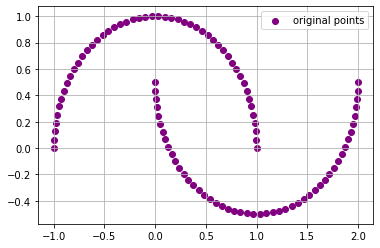

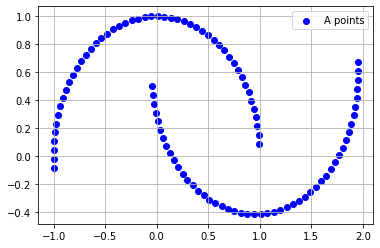

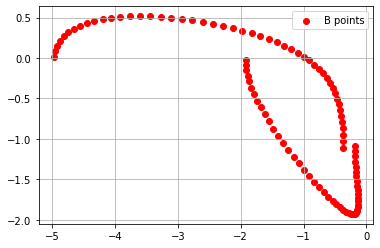

In [ ]:
def d_plot(A_chol, B_chol):
    """
    IMPLEMENT ME
    Generates the two scatter plots as requested in the question
    :param A_chol: Cholesky decomposition of A, as defined in the question
    :param B_chol: Cholesky decomposition of B, as defined in the question
    :return: None
    """
    # Hint: You can use the already implemented plot_scatter function
    plot_scatter([ds[:, 0]], [ds[:, 1]], labels=['original points'], colors=['purple'])
    plot_scatter([A_chol[:, 0]],[A_chol[:, 1]], labels=['A points'], colors=['blue'])
    plot_scatter([B_chol[:, 0]], [B_chol[:, 1]], labels=['B points'], colors=['red'])
d_plot(A_chol.real, B_chol.real)

## Part e: Multiple output linear regression for $H$

Implement the following methods for solving multiple output linear regression and determining if a matrix is orthogonal.

In [ ]:
def solve_multiple_output_linear_regression(X, Y):
    """
    IMPLEMENT ME
    Solves multiple output linear regression
    :param X: X in L(W) = ||Y - XW^T||
    :param Y: Y in L(W) = ||Y - XW^T||
    :return: W in L(W) = ||Y - XW^T||
    """
    W = linalg.inv(np.dot(np.transpose(X),X)).dot(np.transpose(X)).dot(Y)
    print (W)
    return W

def calc_loss(X, Y, W):
    """
    IMPLEMENT ME
    Calculates the loss L(W) = ||Y - XW^T||
    :param X: X in L(W) = ||Y - XW^T||
    :param Y: Y in L(W) = ||Y - XW^T||
    :param W in L(W) = ||Y - XW^T||
    :return: The loss
    """
    m = Y - np.dot(X, np.transpose(W))
    return linalg.norm(m,'fro')

def is_orthogonal(m):
    """
    IMPLEMENT ME
    Returns whether a matrix m is orthogonal
    :param m: The matrix to see if it is ortogonal
    :return: True if m is orthogonal, False otherwise
    """
    # For this part, consider any number x that satisfies -EPS < x < EPS as zero
    I = np.identity(len(m))
    return np.allclose(np.dot(m,np.transpose(m)), I)

W = solve_multiple_output_linear_regression(A_chol[0:2,:].T, ds)
assert W.shape == (2, 2), 'W does not have correct shape!'

loss = calc_loss(A_chol[0:2, :].T, ds, W)
assert loss < 1e-9, 'The optimal objective value should be below 1e-9'
print('W is', W.real)
print('The optimal objective value is:', loss)
print('W is orthogonal:', is_orthogonal(W))


[[ 1.71292564+8.98719366e-09j -0.1894714 +1.93168570e-09j]
 [ 0.12765015+7.65655181e-09j  0.56967677+1.86151277e-09j]]


AssertionError: ignored

## Part f: Multiple output linear regression for $G$

For this part we will be using the already implemented methods for solving multiple output linear regression.

In [ ]:
def x_to_x_tilde(x):
    """
    IMPLEMENT ME
    Computes \tilde{x} which is defined in the question statement
    :param x: input x
    :return: \tilde{x}
    """
    # Hint: You can use the plot_scatter function already implemented in common.py
    one = np.ones(100)
    return np.c_[ one, math.sqrt(2)*x[:,0], math.sqrt(2)*x[:,1], np.matmul(x[:,0],x[:,0]), np.matmul(math.sqrt(2)*x[:,0](x[:,0])), np.matmul(x[:,1],x[:,1]) ]



ds_tilde = x_to_x_tilde(ds)
assert ds_tilde.shape == (100, 6), 'ds_tilde dimensions are not correct!'

W = solve_multiple_output_linear_regression(B_chol[:, :6], ds_tilde)
assert W.shape == (6, 6), 'W does not have correct shape!'

loss = calc_loss(B_chol[:, :6], ds_tilde, W)
assert loss < 1e-9, 'The optimal objective value should be below 1e-9'
print('W is', W.real)
print('The optimal objective value is:', loss)
print('W is orthogonal:', is_orthogonal(W))


TypeError: ignored

## Part g: Plots as a function of $k$

Implement the following methods to produce the requested plots.

In [ ]:
def plot_values(vals, label=None, color=None):
    """
    READ ME TO UNDERSTAND ME :)
    Plots values
    :param vals: a list of real numbers, i.e., values to plot
    :param label: label of the plot
    :param color: color of the plot
    :return: None
    """
    fig, ax = plt.subplots()

    ax.plot([x + 1 for x in range(len(vals))], vals, label=label, color=color)
    ax.legend()
    fig.show()

def first_plot(B, B_chol):
    """
    IMPLEMENT ME
    Plot the first part of `g`
    :param B: matrix B defined in the assignment
    :param B_chol: Cholesky decomposition of B
    :return: None
    """
    # Hint: You can use the plot_values function already implemented in common.py
    vals = []  # fill this with values for different k \in {1...8}

    plot_values(vals, 'first plot for g', color='blue')


def second_plot(x_tilde, B):
    """
    IMPLEMENT ME
    Plot the second part of `g`
    :param x_tilda: \tilde{x} defined in the question in part f
    :param B: matrix B defined in the assignment
    :return: None
    """
    # Hint: You can use linalg.svd to compute SVD
    # Hint: You can use the plot_values function already implemented in common.py

    # Hint: If you need to convert singular values (\Sigma) to a matrix of a proper
    # size, you can use np.vstack to add the missing rows to the diagonal matrix, \Sigma

    vals = []  # fill this with values for different k \in {1...8}
    u = None  # assign U (U\Sigma V^T) to this variable
    s = None  # assign \Sigma (U\Sigma V^T) to this variable
    vh = None  # assign V^T (U\Sigma V^T) to this variable
    # assign the above variables appropriately
    assert np.allclose(np.matmul(np.matmul(u, s), vh), x_tilde), \
        'Wrong SVD, make sure dimensions of \Sigma are appropriate.' \
        'This error goes away once SVD is correct.'

    plot_values(vals, 'second plot for g', color='red')

first_plot(B, B_chol)
second_plot(ds_tilde, B)